## Imports

In [1]:
import sys
import numpy as np
import pandas as pd
from os.path import abspath, join as opj
from scipy.spatial.distance import cdist

sys.path.insert(0, abspath('../helpers/'))
from participant import Participant
from experiment import Experiment

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Set paths & params

In [2]:
fig_dir = '../../paper/figs/'

plt.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')
cmap = 'rocket'

## Load data

In [3]:
exp = Experiment()
exp.load_lecture_trajs()
exp.load_question_vectors()

ff_lec = exp.forces_traj
bos_lec = exp.bos_traj
ff_qs = exp.get_question_vecs(lectures='forces')
bos_qs = exp.get_question_vecs(lectures='bos')

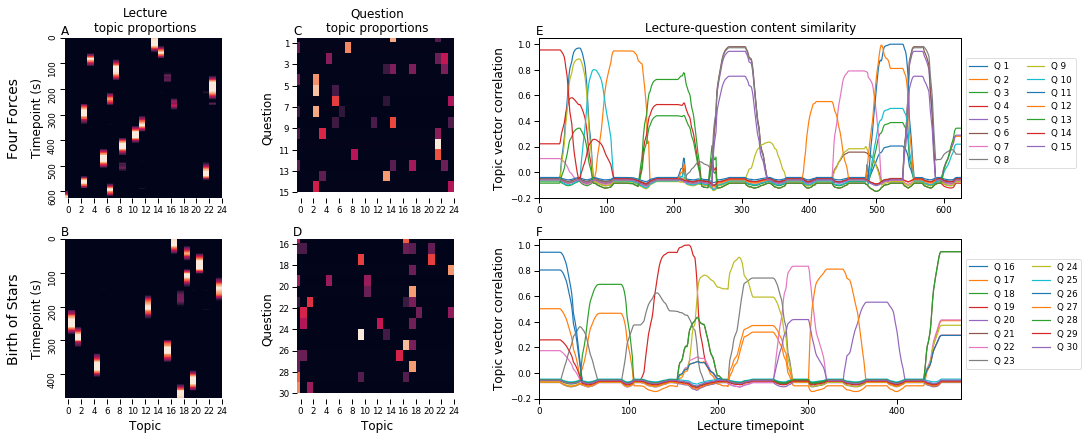

In [4]:
fig, axarr = plt.subplots(2, 3, 
                          constrained_layout=True, 
                          gridspec_kw={'width_ratios': [1, 1, 2]})
fig.set_size_inches(15, 6)
(
    (a, c, e), 
    (b, d, f)
) = axarr


a = sns.heatmap(ff_lec, vmin=0, vmax=1, xticklabels=2, yticklabels=100, 
                cbar=False, cmap=cmap, ax=a)
a.set_title('Lecture\ntopic proportions', fontsize=12)
a.set_ylabel('Timepoint (s)', fontsize=12)
a.annotate('Four Forces', xy=(-.75, .5), xycoords=a.yaxis.label, size='x-large', 
           rotation=90, ha='right', va='center')
a.collections[0].remove()
aspect = ff_lec.shape[1] / ff_lec.shape[0]
a.imshow(ff_lec, aspect=aspect, cmap=cmap)

b = sns.heatmap(bos_lec, vmin=0, vmax=1, xticklabels=2, yticklabels=100, 
                cbar=False, cmap=cmap, ax=b)
b.set_xlabel('Topic', fontsize=12)
b.set_ylabel('Timepoint (s)', fontsize=12)
b.annotate('Birth of Stars', xy=(-.75, .5), xycoords=b.yaxis.label, size='x-large', 
           rotation=90, ha='right', va='center')

b.collections[0].remove()
aspect = bos_lec.shape[1] / bos_lec.shape[0]
b.imshow(bos_lec, aspect=aspect, cmap=cmap)

c = sns.heatmap(ff_qs, vmin=0, vmax=1, xticklabels=2, yticklabels=2, 
                cbar=False, cmap=cmap, ax=c)
c.set_yticklabels(list(range(1, 16, 2)), rotation=0)
c.set_title('Question\ntopic proportions', fontsize=12)
c.set_ylabel('Question', fontsize=12)
c.collections[0].remove()
aspect = ff_qs.shape[1] / ff_qs.shape[0]
c.imshow(ff_qs, aspect=aspect, cmap=cmap)

d = sns.heatmap(bos_qs, vmin=0, vmax=1, xticklabels=2, yticklabels=2, 
                cbar=False, cmap=cmap, ax=d)
d.set_yticklabels(list(range(16, 31, 2)), rotation=0)
d.set_xlabel('Topic', fontsize=12)
d.set_ylabel('Question', fontsize=12)
d.collections[0].remove()
aspect = bos_qs.shape[1] / bos_qs.shape[0]
d.imshow(bos_qs, aspect=aspect, cmap=cmap)

e.plot(1 - cdist(ff_lec, ff_qs, 'correlation'))
e.set_title('Lecture-question content similarity', fontsize=12)
e.set_xlim(0, ff_lec.shape[0])
e.set_ylim(-.2, 1.05)
e.set_ylabel('Topic vector correlation', fontsize=12)
e.legend(labels=[f'Q {i}' for i in range(1, 16)], ncol=2, bbox_to_anchor=(1,.9))
e.grid(False)

f.plot(1 - cdist(bos_lec, bos_qs, 'correlation'))
f.set_xlim(0, bos_lec.shape[0])
f.set_ylim(-.2, 1.05)
f.set_xlabel('Lecture timepoint', fontsize=12)
f.set_ylabel('Topic vector correlation', fontsize=12)
f.legend(labels=[f'Q {i}' for i in range(16, 31)], ncol=2, bbox_to_anchor=(1, .9))
f.grid(False)

labels = 'ABCDEF'
for i, ax in enumerate((a, b, c, d, e, f)):
    ax.text(0, 1.02, labels[i], horizontalalignment='center', 
            transform=ax.transAxes, fontsize=12)

# plt.tight_layout()
# plt.savefig(opj(fig_dir, 'lecture-question-similarity.pdf'), dpi=1000)
plt.show()